# Criação de um sismograma sintético 1D


In [6]:
# Importa as bibiliotecas necessárias
import sys  
import os
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import lasio

In [26]:
# funções auxiliares:

def dt2velC(dept, dt):
    """
    Calcula a derivada central para o cálculo da taxa de velocidade.

    Parâmetros:
    dt (list ou np.array): vetor de entrada.
    dept (float): intervalo entre os pontos do vetor.

    Retorna:
    velocidade (np.array): vetor de derivadas.
    """
    import numpy as np

    velocidade = np.zeros_like(dt)
    for i in range(1, len(dt) - 1):
        velocidade[i] = (dt[i+1] - dt[i-1]) / (dept[i+1] - dept[i-1]) 

    # As derivadas nas extremidades do vetor são calculadas usando diferenças para a frente e para trás
    velocidade[0] = (dt[1] - dt[0]) / (dept[1] - dept[0])
    velocidade[-1] = (dt[-1] - dt[-2]) / (dept[-1] - dept[-2])

    return velocidade


def dt2velP(dept, dt):
    """
    Calcula a derivada progressiva de um vetor.

    Parâmetros:
    dt (list ou np.array): vetor de entrada.
    dept (float): intervalo entre os pontos do vetor.

    Retorna:
    velocidade (np.array): vetor de derivadas.
    """
    import numpy as np

    velocidade = np.zeros_like(dt)
    for i in range(len(dt) - 1):
        velocidade[i] = (dt[i+1] - dt[i]) / (dept[i+1] - dept[i])

    # A derivada no último ponto não pode ser calculada usando uma diferença para a frente,
    # então usamos uma diferença para trás.
    velocidade[-1] = (dt[-1] - dt[-2]) / (dept[-1] - dept[-2])

    return velocidade

In [27]:
# Leitura dos dados de entrada
dt = lasio.read('../inputs/1ess53ess_1.las')
rhob = lasio.read('../inputs/1ess53ess_2.las')

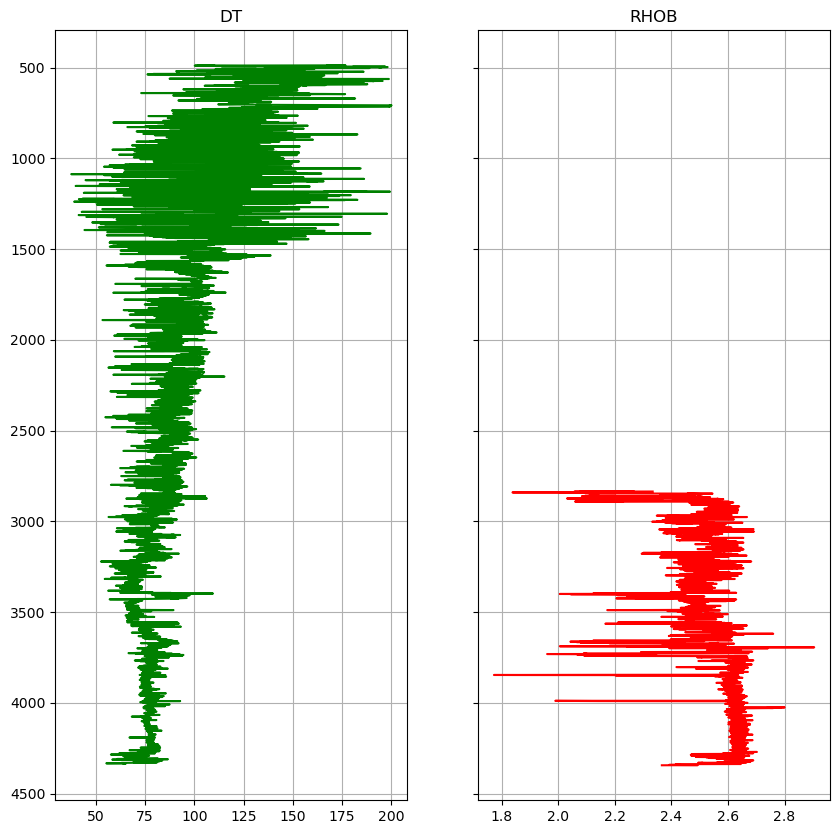

In [28]:
dt.header

# Acessar os dados
depth1 = dt['DEPTH']
track1 = dt['DT']
depth2 = rhob['DEPTH']  
track2 = rhob['RHOB']

# Criar os gráficos
fig, axs = plt.subplots(1, 2, figsize=(10,10), sharey=True)

# Primeiro gráfico
axs[0].plot(track1, depth1,'g')
axs[0].set_title('DT') 
axs[0].grid(True)

# Segundo gráfico
axs[1].plot(track2, depth2,'r')
axs[1].set_title('RHOB')  
axs[1].grid(True)


plt.gca().invert_yaxis()  # Inverter o eixo y para que a profundidade aumente para baixo
plt.show()

In [29]:
# Calcular a velocidade
vel1 = dt2velC(depth1, track1)
vel2 = dt2velP(depth1, track1)

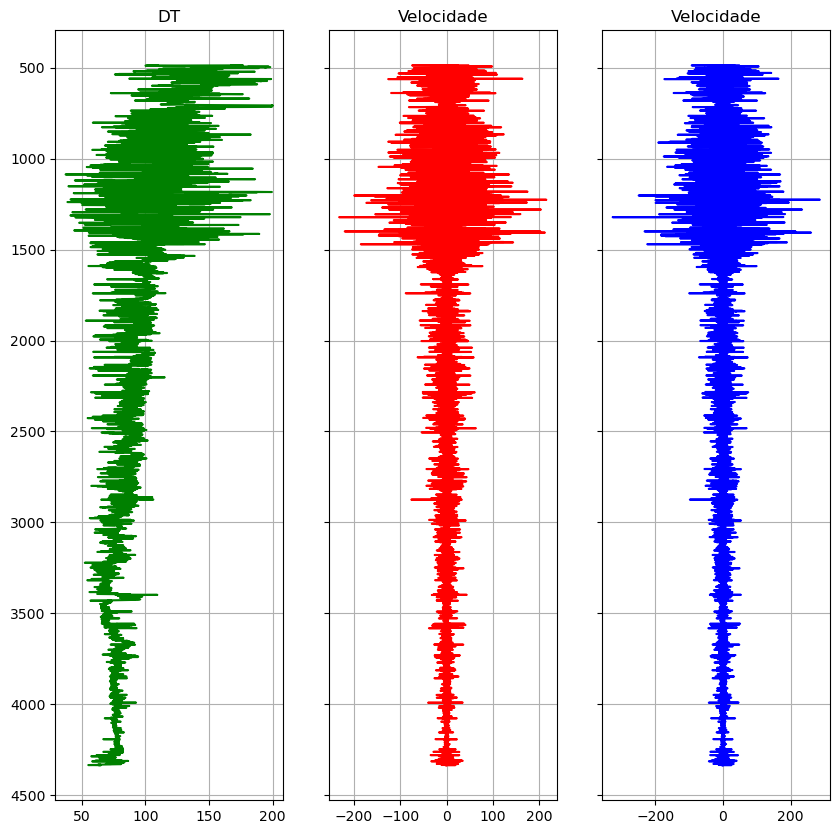

In [31]:
# Acessar os dados
depth1 = dt['DEPTH']
track1 = dt['DT']
depth2 = rhob['DEPTH']

# Criar os gráficos
fig, axs = plt.subplots(1, 3, figsize=(10,10), sharey=True)

# Primeiro gráfico
axs[0].plot(track1, depth1,'g')
axs[0].set_title('DT') 
axs[0].grid(True)

# Segundo gráfico
axs[1].plot(vel1, depth1,'r')
axs[1].set_title('Velocidade (Derivada Central)')  
axs[1].grid(True)

# Terceiro gráfico
axs[2].plot(vel2, depth1,'b')
axs[2].set_title('Velocidade (Derivada Progressiva)')  
axs[2].grid(True)


plt.gca().invert_yaxis()  # Inverter o eixo y para que a profundidade aumente para baixo
plt.show()